In [1]:
# %load ml.py
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df=pd.read_csv('./data/homeprices2.csv')
df
df.isnull().sum()

,area,bedrooms,age,price
0,2600,3.00,20,550000
1,3000,4.00,15,565000
2,3200,NaN,18,610000
3,3600,3.00,30,595000
4,4000,5.00,8,760000
5,4100,6.00,8,810000


area        0
bedrooms    1
age         0
price       0
dtype: int64

**Data Preprocessing: Fill NA values with median value of a column**

In [3]:
df['bedrooms'].median()

df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].median())
df.isnull().sum()

4.0

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [4]:
lr=linear_model.LinearRegression()

lr.fit(df.drop(['price'], axis=1), df['price'])

LinearRegression()

In [5]:
lr.coef_
lr.intercept_

array([  112.06244194, 23388.88007794, -3231.71790863])

221323.00186540408

In [6]:
area_val=int(input('Enter your area: '))
br_num=int(input('Enter your bedroom numbers: '))
ag_val=int(input('How old the house?: '))
  

Enter your area: 2000
Enter your bedroom numbers: 4
How old the house?: 5


In [7]:
predicted_price=lr.coef_[0]*area_val + lr.coef_[1]*br_num + lr.coef_[2]*ag_val + lr.intercept_
print(f'${predicted_price: ^15,.2f}')

$  522,844.82   


In [8]:
val=lr.predict([[2500, 4, 5]])
print(f'${val[0]: ^15,.2f}')

$  578,876.04   


C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Excecise
`hiring.csv` file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

In [43]:
df=pd.read_csv('./data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.00,9,50000
1,NaN,8.00,6,45000
2,five,6.00,7,60000
3,two,10.00,10,65000
4,seven,9.00,6,70000
5,three,7.00,10,62000
6,ten,NaN,7,72000
7,eleven,7.00,8,80000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [46]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [47]:
cond=df['experience'].isnull()
df.loc[cond].index

Int64Index([0, 1], dtype='int64')

In [48]:
# provide 0 for thos who show 'NaN' for the experience item

df['experience'].fillna('zero', inplace=True)

In [49]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.00,9,50000
1,zero,8.00,6,45000
2,five,6.00,7,60000
3,two,10.00,10,65000
4,seven,9.00,6,70000
5,three,7.00,10,62000
6,ten,NaN,7,72000
7,eleven,7.00,8,80000


In [50]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [51]:
from word2number import w2n

def w2nn(x):
    return w2n.word_to_num(x)

df['experience']=df['experience'].apply(w2nn)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.00,9,50000
1,0,8.00,6,45000
2,5,6.00,7,60000
3,2,10.00,10,65000
4,7,9.00,6,70000
5,3,7.00,10,62000
6,10,NaN,7,72000
7,11,7.00,8,80000


In [52]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.00,9,50000
1,0,8.00,6,45000
2,5,6.00,7,60000
3,2,10.00,10,65000
4,7,9.00,6,70000
5,3,7.00,10,62000
6,10,8.00,7,72000
7,11,7.00,8,80000


In [53]:
X=df.drop(['salary($)'], axis=1)
X

y=df['salary($)']
y

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.00,9
1,0,8.00,6
2,5,6.00,7
3,2,10.00,10
4,7,9.00,6
5,3,7.00,10
6,10,8.00,7
7,11,7.00,8


0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

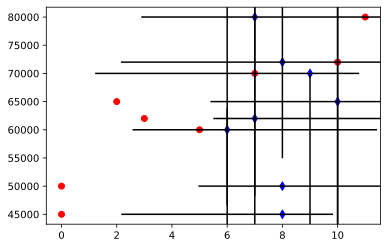

In [54]:
plt.scatter(df['experience'], df['salary($)'], color='red')
plt.scatter(df['test_score(out of 10)'], df['salary($)'], color='blue', marker='d')
plt.scatter(df['interview_score(out of 10)'], df['salary($)'], s=df['salary($)'], color='black', marker='+')

In [55]:
lr=linear_model.LinearRegression()
lr.fit(X,y)

LinearRegression()

**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

In [56]:
ce=lr.coef_
ic=lr.intercept_
print(ce, ic)

[2812.95487627 1845.70596798 2205.24017467] 17737.26346433771


In [57]:
ex_val=int(input('Enter xperience year '))
test_num=int(input('Enter test score: '))
int_val=int(input('Enter interview score: '))

total_score=ce[0]*ex_val + ce[1]*test_num + ce[2]*int_val + ic

print(total_score)

Enter xperience year 2
Enter test score: 9
Enter interview score: 6
53205.96797671034


In [61]:
answer=input('Do you want to predict candiate total score? (y/n) ')

results=[]
while answer=='y'.lower():
    


    ex_val=int(input('Enter xperience year '))
    test_num=int(input('Enter test score: '))
    int_val=int(input('Enter interview score: '))

    total_score=ce[0]*ex_val + ce[1]*test_num + ce[2]*int_val + ic
    results.append(round(total_score, 2))
    

    print(f'${total_score: ^15,.2f}')
    keep_predict=input('Do you want to continue: (y/n)')
    if keep_predict=='n'.lower():
        break
        
print(results)

Do you want to predict candiate total score? (y/n) y
Enter xperience year 2
Enter test score: 9
Enter interview score: 6
$   53,205.97   
Do you want to continue: (y/n)y
Enter xperience year 12
Enter test score: 10
Enter interview score: 10
$   92,002.18   
Do you want to continue: (y/n)n
[53205.97, 92002.18]


In [62]:
lr.predict([[2, 9, 6]])
lr.predict([[12, 10, 10]])

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53205.96797671])

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92002.18340611])